# Exercício 5 de Análise de Componentes Independentes
Pedro Bandeira de Mello Martins

CPE 782 - Análise de Componentes Independentes



Análise feita para 1000 amostras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.cluster.vq import whiten
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.stats import entropy, chi2_contingency, shapiro

%matplotlib inline
from evaluation import calculateNegentropy, kde_entropy, KLdivergence, resultsTable, plot_MutualInformation
from ICAfunctions import cichocki_Feedback, cichocki_Feedforward, NPCA_RLS

#Notes:
#SHAPIRO: The algorithm used is described in [R634] but censoring parameters as 
#        described are not implemented. For N > 5000 the W test statistic is 
#        accurate but the p-value may not be.

In [2]:
learning_rate = 1e-6
gaussian_distribution = np.random.normal(0,1,1000)
shapiro(np.random.uniform(-1,1,1000))

(0.9523873329162598, 1.8012084485830017e-17)

In [3]:
filePath = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/FifthMixture1000Stats.txt'
distDataFrame = pd.read_table(filePath, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.T.head())

          0         1         2         3
0 -2.254435  1.269680  3.109093  5.606695
1 -1.859614  1.153184  4.915222  5.556775
2 -3.108203  0.075993  6.603966  5.510849
3 -2.297548  0.778421  0.780893  4.836742
4  0.506497  1.730168  1.498197  2.988263


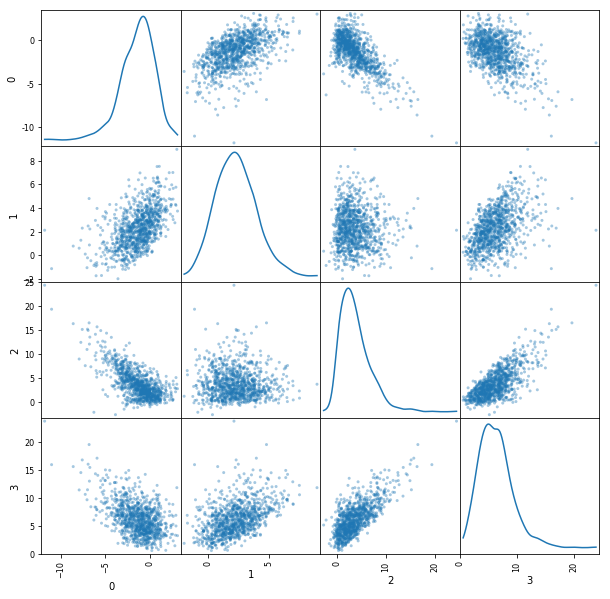

In [4]:
scatter_matrix(distDataFrame.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

In [5]:
resultsTable(mixtures)

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.1511,1.3841,0.9694,1.1693e-13
1,0,0.079,0.9923,4.8145e-05
2,0.3968,2.1115,0.9132,1.8515e-23
3,0.1071,1.2402,0.956,9.2e-17


## NPCA-RLS Algorithm

In [6]:
[yNPCA, WNPCA] = NPCA_RLS(mixtures,runs = 1)

Execution time: 0.08600974082946777 seconds


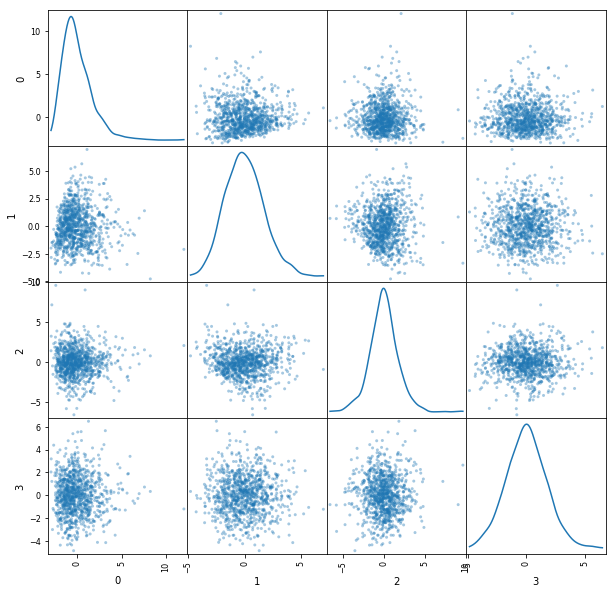

In [7]:
scatter_matrix(pd.DataFrame(yNPCA.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.3084,1.8353,0.913,1.7421e-23
1,0.1311,0.1832,0.9936,0.0002834
2,0.4551,0.3463,0.9797,1.409e-10
3,0,0.302,0.9969,0.046309


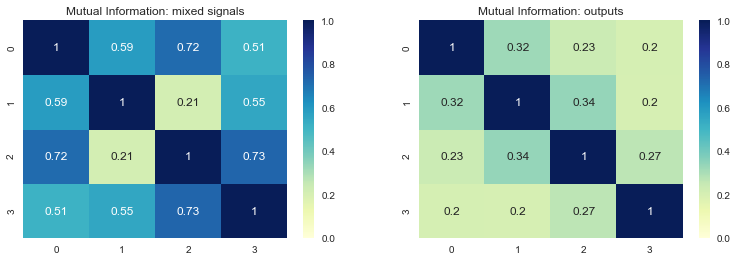

In [8]:
resultsTable(yNPCA)
plot_MutualInformation(mixtures, y = yNPCA, KDE = True)

## Chichocki-Unbehauen Algorithm Feedback network

In [9]:
[yFeedback, WFeedback] = cichocki_Feedback(mixtures, learningRate = 1e-1,runs  = 1) 

Execution time: 0.10801339149475098 seconds


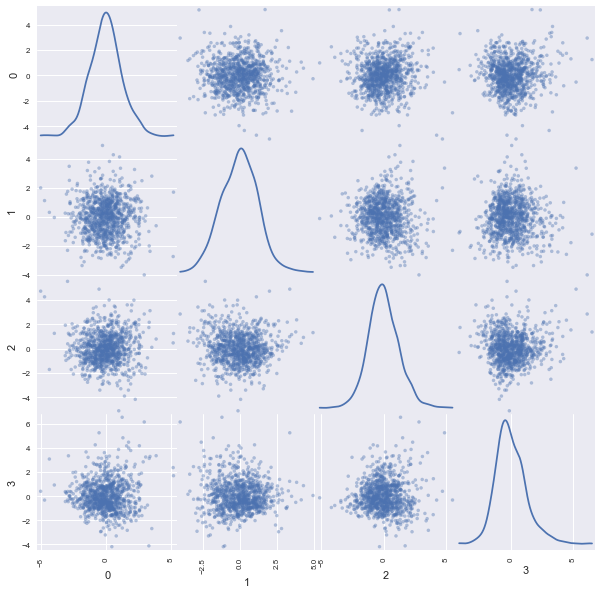

In [10]:
scatter_matrix(pd.DataFrame(yFeedback.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.15,0.1834,0.9933,0.00017903
1,0.0451,0.1941,0.9966,0.027359
2,0.2656,0.1602,0.9886,4.9966e-07
3,0.2894,0.6214,0.9639,5.0757e-15


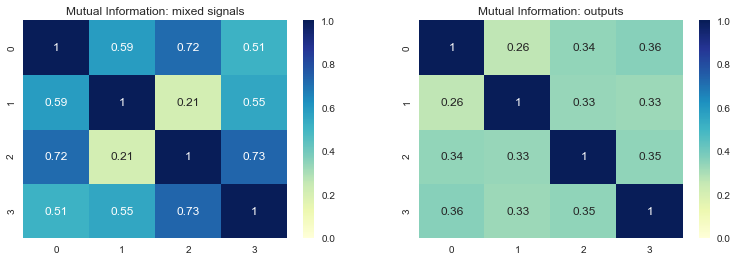

In [11]:
resultsTable(yFeedback)
plot_MutualInformation(mixtures, y = yFeedback, KDE = True)

## Chichocki-Unbehauen Algorithm Feedforward network

In [12]:
[yFeedforward, WFeedforward] = cichocki_Feedforward(mixtures, learningRate = 1e-4, runs = 1)

Execution time: 0.07850980758666992 seconds


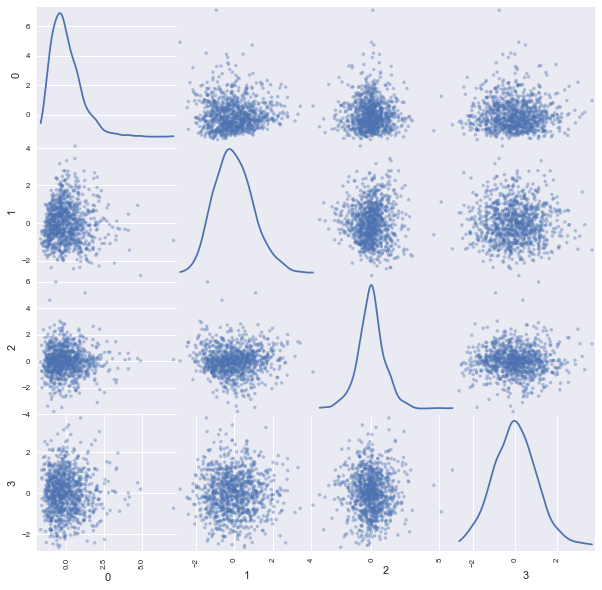

In [13]:
scatter_matrix(pd.DataFrame(yFeedforward.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.3034,1.5345,0.9114,1.1067e-23
1,0.0165,0.2255,0.9905,4.3978e-06
2,0.4696,0.2195,0.9747,3.4274e-12
3,0,0.2446,0.997,0.061144


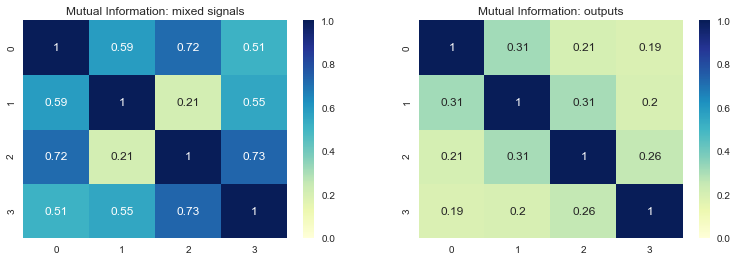

In [14]:
resultsTable(yFeedforward)
plot_MutualInformation(mixtures, y = yFeedforward, KDE = True)